In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf
from IPython.display import clear_output
import tensorflow.compat.v2.feature_column as fc

#### selecting data for model training and model evaluation

In [51]:
dftrain = pd.read_csv('linear_regression_data_train.csv', delimiter=";") 
dfeval = pd.read_csv('linear_regression_data_eval.csv', delimiter=";") 
y_train = dftrain.pop('chronic diseases')
y_eval = dfeval.pop('chronic diseases')
print(dftrain.head())
print(dfeval.head())

   activity  alcohol  smoking  sex  age  self-esteem    BMI
0         0        1        1    1   13           56  40.83
1         1        0        0    1   13           59  28.07
2         1        1        0    1   13           50  20.82
3         1        0        1    1   13           94  16.36
4         1        0        0    1   13          100  16.44
   activity  alcohol  smoking  sex  age  self-esteem    BMI
0         1        0        0    1   16           67  17.72
1         0        0        0    2   16           76  20.28
2         1        0        0    2   16           64  24.42
3         1        1        1    2   16           64  22.66
4         1        1        0    2   16           57  24.16


#### checking what is the distribution of BMI in data selected for training

<AxesSubplot:>

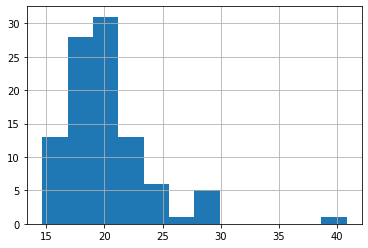

In [52]:
dftrain['BMI'].hist(bins=12)


#### checking what is the distribution of sex in data selected for training

[Text(0, 0, 'female'), Text(0, 1, 'male')]

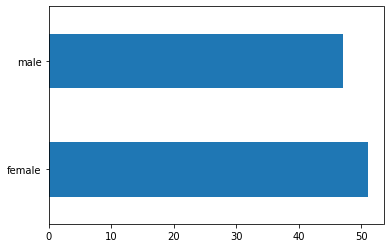

In [53]:
bars = dftrain['sex'].value_counts().plot(kind='barh')
bars.set_yticklabels(("female", "male"))

#### checking what is the distribution of chronic disease dependent on sex

[Text(0, 0, 'female'), Text(0, 1, 'male')]

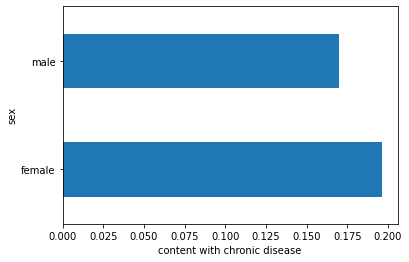

In [54]:
bars = pd.concat([dftrain, y_train], axis=1).groupby('sex')['chronic diseases'].mean().plot(kind='barh')
bars.set_xlabel('content with chronic disease')
bars.set_yticklabels(("female", "male"))

#### creating columns with dependent variables to train the model

In [55]:
NUMERIC_COLUMNS = ['activity', 'alcohol', 'smoking', 'sex', 'age', 'self-esteem', 'BMI']
feature_columns = []
for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[NumericColumn(key='activity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='alcohol', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='smoking', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='sex', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='self-esteem', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


#### creating training and evaluation model

In [56]:
def make_input_function(data, label, num_epochs=40, shuffle=True, batch_size=20):
  def input_function():  
    data_set = tf.data.Dataset.from_tensor_slices((dict(data), label))  
    if shuffle:
      data_set = data_set.shuffle(10)  
    data_set = data_set.batch(batch_size).repeat(num_epochs)  
    return data_set
  return input_function  

train_input_function = make_input_function(dftrain, y_train)  
eval_input_function = make_input_function(dfeval, y_eval, num_epochs=1, shuffle=False)

#### using the model and checking its accuracy

In [57]:
linear_estimation = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_estimation.train(train_input_function) 
result = linear_estimation.evaluate(eval_input_function)  

clear_output()
print(result['accuracy']) 

0.6363636
